In [39]:
# Используемые модули
import pandas
from more_itertools import chunked
import matplotlib.pyplot as plt
from itertools import zip_longest
from scipy.stats import chi2
import sympy
import math
import numpy

In [40]:
# Считывание таблицы вариантов
with open("var.txt") as f:
    vals = list(map(lambda x: float(x), f.read().replace(",", ".").split()))

In [41]:
# Выбираю набор для второго варианта
t = list(chunked(vals, 10))
xy = [[ti[2], ti[3]] for ti in t]
xy.sort(key=lambda x: x[0])
xi, yi = list(map(lambda x: x[0], xy)), list(map(lambda x: x[1], xy))
n = len(xi)

In [42]:
xy.sort(key=lambda x: x[0])
df = pandas.DataFrame(
    xy,
    columns=list("xy")
)
df = df.set_index("x")
display(df)

,y
x,
3.0,10.5
3.1,13.7
3.2,18.9
3.2,14.5
3.5,17.3
3.5,11.8
3.6,18.4
3.7,20.5
4.1,16.4


Выводим корреляционное поле


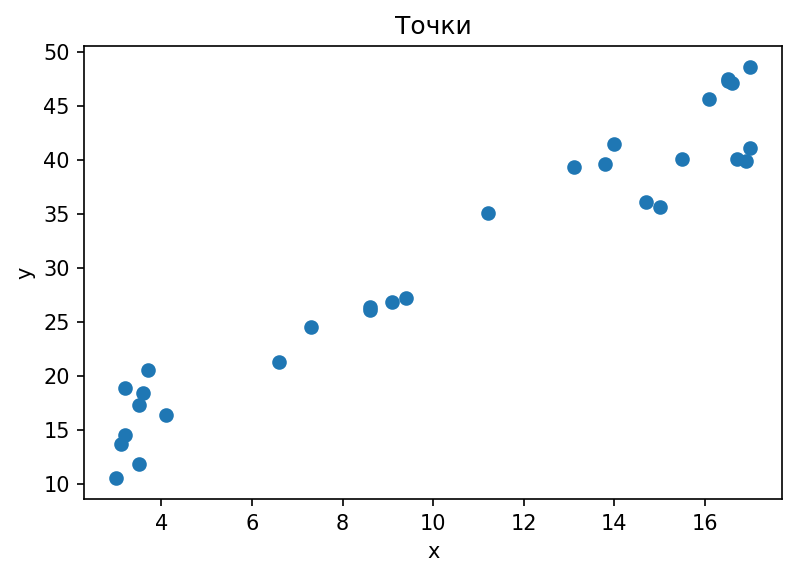

In [43]:
fig, ax = plt.subplots()
fig.set_dpi(150)
ax.plot(xi, yi, "o")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Точки')
print("Выводим корреляционное поле")

In [44]:
# Строим таблицу значений для расчета линейной регрессии
i = list(range(1,n+1))
xis = list(map(lambda x: x, xi))
yis = list(map(lambda x: math.log(x), yi))
x2s = list(map(lambda x: x**2, xis))
xumnys = list(map(lambda x: x[0]*x[1], zip(xis, yis)))
y2s = list(map(lambda x: x**2, yis))

x2 = list(map(lambda x: x**2, xi))
xumny = list(map(lambda x: x[0]*x[1], zip(xi, yi)))
y2 = list(map(lambda x: x**2, yi))

sumx = sum(xi)
sumy = sum(yi)
sumx2 = sum(x2)
sumxy = sum(xumny)
sumy2 = sum(y2)
meany2 = sumy2/n
meanxy = sumxy/n
meanx = sumx/n
meany = sumy/n
meanx2 = sumx2/n

sumxs = sum(xis)
sumys = sum(yis)
sumx2s = sum(x2s)
sumxys = sum(xumnys)
sumy2s = sum(y2s)
meany2s = sumy2s/n
meanxys = sumxys/n
meanxs = sumxs/n
meanys = sumys/n
meanx2s = sumx2s/n
b1 = (meanxys - meanxs*meanys)/(meanx2s - meanxs**2)
b0 = math.e**(meanys - b1*meanxs)
def func(x):
    return b0*(math.e**(b1*x))
yrasch = list(map(lambda x: func(x), xi))
err = list(map(lambda x: x[0] - x[1], zip(yi, yrasch)))
err2 = list(map(lambda x: x**2, err))
sumyrasch = sum(yrasch)
meanyrasch = sumyrasch/n
sumerr = sum(err)
meanerr = sumerr/n
sumerr2 = sum(err2)
meanerr2 = sumerr2/n
df = pandas.DataFrame(
        zip_longest(
            i + ["sum", "sum/n"],
            xi + [sumx, meanx],
            yi + [sumy, meany],
            xis + [sumxs, meanxs],
            yis + [sumys, meanys],
            x2s + [sumx2s, meanx2s],
            xumnys + [sumxys, meanxys],
            y2s + [sumy2s, meany2s],
            yrasch + [sumyrasch, meanyrasch],
            err2 + [sumerr2, meanerr2],
            err + [sumerr, meanerr]
        ),
        columns=[
            'i',
            'x',
            'y',
            'x`',
            'y`',
            'x`^2',
            'x`y`',
            'y`^2',
            '^y',
            'e^2',
            "e"
        ]
    )
df.set_index("i",inplace=True)
display(
    df
)

,x,y,x`,y`,x`^2,x`y`,y`^2,^y,e^2,e
i,,,,,,,,,,
1,3.00,10.500000,3.00,2.351375,9.000000,7.054126,5.528966,15.525061,25.251242,-5.025061
2,3.10,13.700000,3.10,2.617396,9.610000,8.113927,6.850761,15.649066,3.798858,-1.949066
3,3.20,18.900000,3.20,2.939162,10.240000,9.405318,8.638673,15.774061,9.771496,3.125939
4,3.20,14.500000,3.20,2.674149,10.240000,8.557276,7.151071,15.774061,1.623231,-1.274061
5,3.50,17.300000,3.50,2.850707,12.250000,9.977473,8.126528,16.155068,1.310869,1.144932
6,3.50,11.800000,3.50,2.468100,12.250000,8.638348,6.091515,16.155068,18.966617,-4.355068
7,3.60,18.400000,3.60,2.912351,12.960000,10.484462,8.481786,16.284105,4.477013,2.115895
8,3.70,20.500000,3.70,3.020425,13.690000,11.175572,9.122966,16.414172,16.693992,4.085828
9,4.10,16.400000,4.10,2.797281,16.810000,11.468853,7.824783,16.944913,0.296930,-0.544913


Выводим корреляционное поле


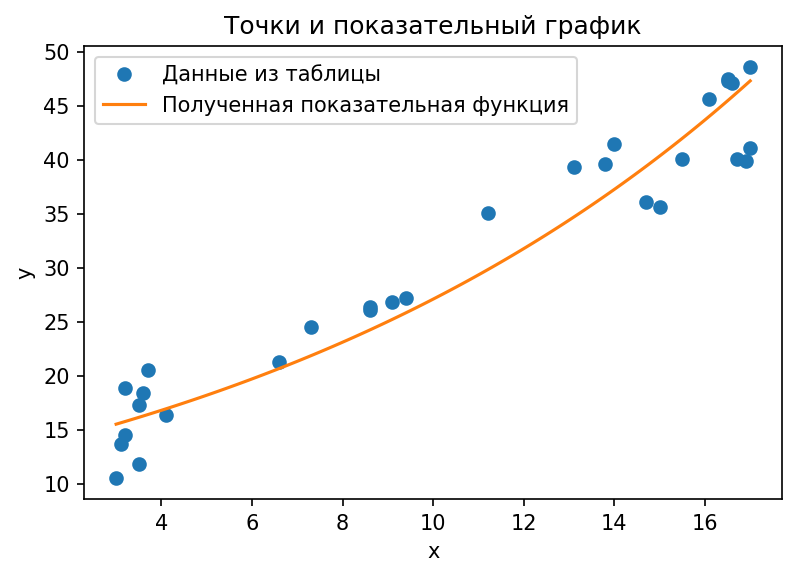

In [45]:
# Давайте построим полученную линейную регрессию поверх поля
fig, ax = plt.subplots()
fig.set_dpi(150)
ax.plot(xi, yi, "o")
x_rasch = numpy.linspace(min(xi), max(xi), 100)
y_raschs = list(map(lambda x: func(x), x_rasch))
line, = ax.plot(x_rasch, y_raschs)
line.set_label("Линейная")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(["Данные из таблицы", "Полученная показательная функция"])
ax.set_title('Точки и показательный график')
print("Выводим корреляционное поле")
x_symbol = sympy.Symbol("x")
sympy.init_printing()
display(b0*(math.e**b1)**(x_symbol))

In [46]:
# Анализ силы и направленности линейной зависимости
rxy = (meanxy - meanx * meany)/(((meanx2 - meanx**2)**0.5)*((meany2 - meany**2)**0.5))
print("rxy =", rxy)
mrxy = abs(rxy)
lkk = "Слабая"
critery2 = 1
if mrxy >= 0.9:
    lkk = "Весьма высокая"
    critery1 = 5
elif mrxy >= 0.7:
    lkk = "Высокая"
    critery1 = 4
elif mrxy >= 0.5:
    lkk = "Заметная"
    critery1 = 3
elif mrxy >= 0.3:
    lkk = "Умеренная"
    critery1 = 2
if rxy > 0:
    print(lkk, "прямая линейная зависимость")
elif rxy < 0:
    print(lkk, "обратная линейная зависимость")
else:
    print("Зависимость неизвестна")

rxy = 0.9697207601439933
Весьма высокая прямая линейная зависимость


In [47]:
# Для оценки качества полученного уравнения регрессии проверим значимость каждого параметра уравнения регрессии.
s2 = sumerr2/(n-2)
s2_b1 = s2 / (n* (meanx2 - meanx**2)) 
s2_b0 = s2_b1 * meanx2
s_b1 = s2_b1 **0.5
s_b0 = s2_b0 **0.5
tb1 = b1/(s_b1)
tb0 = b0/(s_b0)
print("tb0 =", tb0)
print("tb1 =", tb1)
for a in [0.05, 0.01]:
    print()
    tcrit = chi2.ppf(1 - a, n - 2)
    print("Если a =", a, "и n =",n,", то tкрит =",tcrit)
    if abs(tcrit) > abs(tb0) and abs(tcrit) > abs(tb1):
        print("На уровне значимости a =", a, "статистическая значимость параметров регрессии b0 и b1 подтверждается. Нет необходимости корректировать модель.")
    else:
        print("На уровне значимости a =", a, "статистическая значимость параметров регрессии b0 и b1 не подтверждается. Необходимо корректировать модель.")

tb0 = 8.760267824863327
tb1 = 0.6670384247224658

Если a = 0.05 и n = 30 , то tкрит = 41.33713815142739
На уровне значимости a = 0.05 статистическая значимость параметров регрессии b0 и b1 подтверждается. Нет необходимости корректировать модель.

Если a = 0.01 и n = 30 , то tкрит = 48.27823577031548
На уровне значимости a = 0.01 статистическая значимость параметров регрессии b0 и b1 подтверждается. Нет необходимости корректировать модель.


In [48]:
# Рассчитаем интервальные оценки параметров регрессии в генеральной совокупности по формуле:
for a in [0.05, 0.01]:
    print("Имеем с вероятностью p =",1 - a,":")
    tcrit = chi2.ppf(1 - a, n - 2)
    print("tкрит =", tcrit)
    for k, v, sv in zip(["b0", "b1"], [b0, b1], [s_b0, s_b1]):
        print(k,"in (",v - tcrit*sv,";",v + tcrit*sv,")")
    print()

Имеем с вероятностью p = 0.95 :
tкрит = 41.33713815142739
b0 in ( -45.47498040715392 ; 69.93239474460405 )
b1 in ( -4.850648202951573 ; 5.009761102006262 )

Имеем с вероятностью p = 0.99 :
tкрит = 48.27823577031548
b0 in ( -55.16425611285891 ; 79.62167045030904 )
b1 in ( -5.678500185558423 ; 5.837613084613112 )



In [49]:
# Рассчитаем коэффициент детерминации R2 по формуле:
sigmay2 = meany2 - meany**2
r2 = 1 - (meanerr2)/(sigmay2)
print("r2 =", r2)
if r2 > 0.5:
    print("Полученное значение коэффициента детерминации свидетельствует о том, что доля вариации зависимой переменной, объясняемая регрессией, превышает долю вариации, необъясненную уравнением регрессии")
    critery3 = True
elif r2 < 0.5:
    print("Полученное значение коэффициента детерминации свидетельствует о том, что доля вариации зависимой переменной, объясняемая регрессией, занижает долю вариации, необъясненную уравнением регрессии")
    critery3 = False

r2 = 0.9194381786979178
Полученное значение коэффициента детерминации свидетельствует о том, что доля вариации зависимой переменной, объясняемая регрессией, превышает долю вариации, необъясненную уравнением регрессии


In [50]:
# Рассчитаем также скорректированный коэффициент детерминации 2 R , представляющий собой коэффициент детерминации 2 R , который учитывает степени свободы для объясненной дисперсии и остаточной дисперсии:
r2m = 1 - (1 - r2) * ((n - 1)/(n - 2))
print("r2m =", r2m)
if r2m > 0.5:
    print("Полученное исправленное значение коэффициента детерминации свидетельствует о том, что доля вариации зависимой переменной, объясняемая регрессией, превышает долю вариации, необъясненную уравнением регрессии")
elif r2m < 0.5:
    print("Полученное исправленное значение коэффициента детерминации свидетельствует о том, что доля вариации зависимой переменной, объясняемая регрессией, занижает долю вариации, необъясненную уравнением регрессии")

r2m = 0.916560970794272
Полученное исправленное значение коэффициента детерминации свидетельствует о том, что доля вариации зависимой переменной, объясняемая регрессией, превышает долю вариации, необъясненную уравнением регрессии


In [51]:
# Произведем расчет значения статистики Дарбина-Уотсона (DW) для выявления наличия (отсутствия) автокорреляции остатков:
ei_m_ei_m_1_2 = list(map(lambda x: "-" if x == 0 else (err[x] - err[x-1])**2, range(n)))
sum_ei_m_ei_m_1_2 = sum(filter(lambda x: not isinstance(x ,str), ei_m_ei_m_1_2))
df = pandas.DataFrame(
    zip_longest(
        i + ["sum"],
        err + [sumerr],
        ["-"] + err[:-1] + ["-"],
        ei_m_ei_m_1_2 + [sum_ei_m_ei_m_1_2],
        err2 + [sumerr2]
    ),
    columns=["i", "e_i", "e_i-1", "(e_i - e_i-1)^2", "e_i ^2"]
)
df.set_index("i", inplace=True)
display(df)

,e_i,e_i-1,(e_i - e_i-1)^2,e_i ^2
i,,,,
1,-5.025061,-,-,25.251242
2,-1.949066,-5.025061,9.461748,3.798858
3,3.125939,-1.949066,25.755676,9.771496
4,-1.274061,3.125939,19.36,1.623231
5,1.144932,-1.274061,5.851526,1.310869
6,-4.355068,1.144932,30.25,18.966617
7,2.115895,-4.355068,41.873367,4.477013
8,4.085828,2.115895,3.880635,16.693992
9,-0.544913,4.085828,21.443765,0.296930


In [52]:
dw = sum_ei_m_ei_m_1_2/sumerr2
print('dw =', dw)
if dw < 2.5 and dw > 1.5:
    print("Поскольку в соответствии с «приблизительным» правилом расчетное значение DW лежит в интервале 1,5<DW<2,5, то это свидетельствует об отсутствии автокорреляции остатков в данной модели.")
    critery4 = True
else:
    print("Поскольку в соответствии с «приблизительным» правилом расчетное значение DW не лежит в интервале 1,5<DW<2,5, то это свидетельствует об присутствии автокорреляции остатков в данной модели.")
    critery4 = False

dw = 1.2596873466609186
Поскольку в соответствии с «приблизительным» правилом расчетное значение DW не лежит в интервале 1,5<DW<2,5, то это свидетельствует об присутствии автокорреляции остатков в данной модели.


In [53]:
# Применим тест ранговой корреляции Спирмена для проверки построенной модели на наличие или отсутствие гетероскедастичности остатков. Для этого сформируем вспомогательную таблицу 2.7. Пояснение: ранг присваивается, начиная с наименьшего по величине значения.
dx = i
abserr = list(map(lambda x: abs(x), err))
sdy = [x[0] for x in sorted(enumerate(abserr, 1), key=lambda x:x[1])]
dy = [x[0] for x in sorted(enumerate(sdy, 1), key=lambda x:x[1])]
sumdx = sum(dx)
sumdy = sum(dy)
dx_m_dy_2 = list(map(lambda x: (x[0] - x[1])**2, zip(dx, dy)))
sum_dx_m_dy_2 = sum(dx_m_dy_2)
df = pandas.DataFrame(
    zip_longest(
        i + ["sum"],
        xi + ["-"],
        abserr + ["-"],
        dx + [sumdx],
        dy + [sumdy],
        dx_m_dy_2 + [sum_dx_m_dy_2]
    ),
    columns=["i", 'xi', "|ei|", "ранг xi, dx", "ранг ei, dy", "(dx - dy)^2"]
)
df.set_index("i")
display(df)

,i,xi,|ei|,"ранг xi, dx","ранг ei, dy",(dx - dy)^2
0,1,3.0,5.025061,1,26,625
1,2,3.1,1.949066,2,13,121
2,3,3.2,3.125939,3,19,256
3,4,3.2,1.274061,4,4,0
4,5,3.5,1.144932,5,3,4
5,6,3.5,4.355068,6,23,289
6,7,3.6,2.115895,7,15,64
7,8,3.7,4.085828,8,21,169
8,9,4.1,0.544913,9,1,64
9,10,6.6,0.626374,10,2,64


In [54]:
pxe = 1 - 6 * ((sum_dx_m_dy_2) / (n*(n**2 - 1)))
print("pxe =", pxe)
mpxe = abs(pxe)
lkk = "Слабая"
critery2 = 1
if mpxe >= 0.9:
    lkk = "Весьма высокая"
    critery2 = 5
elif mpxe >= 0.7:
    lkk = "Высокая"
    critery2 = 4
elif mpxe >= 0.5:
    lkk = "Заметная"
    critery2 = 3
elif mpxe >= 0.3:
    lkk = "Умеренная"
    critery2 = 2
if pxe > 0:
    print(lkk, "прямая линейная зависимость ошибки и x")
elif pxe < 0:
    print(lkk, "обратная линейная зависимость ошибки и x")
else:
    print("Зависимость неизвестна")

pxe = 0.2004449388209122
Слабая прямая линейная зависимость ошибки и x


In [55]:
# Проверим гипотезу H0: гетероскедастичность остатков отсутствует. Рассчитаем фактическое значение t-критерия по формуле
tf = (abs(pxe) * ((n-2)**0.5))/((1 - pxe**2)**0.5)
print("tf =", tf)
for a in [0.05, 0.01]:
    print()
    print("Имеем с вероятностью p =",1 - a,":")
    tcrit = chi2.ppf(1 - a, n - 2)
    print("tкрит =", tcrit)
    if tcrit > tf:
        print("Принимаем гипотезу H0: гетероскедастичность остатков отсутствует.")
    else:
        print("Не принимаем гипотезу H0: гетероскедастичность остатков присутствует.")

tf = 1.0826268650302677

Имеем с вероятностью p = 0.95 :
tкрит = 41.33713815142739
Принимаем гипотезу H0: гетероскедастичность остатков отсутствует.

Имеем с вероятностью p = 0.99 :
tкрит = 48.27823577031548
Принимаем гипотезу H0: гетероскедастичность остатков отсутствует.


In [56]:
# Расчитаем среднюю ошибку аппроксимации
a = sum([abs(err[i]/yi[i]) for i in range(n)])/n
p = a*100
print(f"{round(p,3)}%")
critery5 = True
if p > 10:
    critery5 = False
    print("Точность не приемлима")
else:
    print("Точность приемлима")

11.397%
Точность не приемлима


In [57]:
# Получение доверительного интервала при a=0.95
xp = meanx*1.1
yp = func(xp)
tcrit = chi2.ppf(0.95, n - 2)
s2yp = s2*(1 + 1/n + ((xp - meanx)**2)/(sum([(xi[i] - meanx)**2 for i in range(n)])))
dov_int = (
    yp - tcrit*(s2yp**0.5),
    yp + tcrit*(s2yp**0.5),
)
print("Доверительный интервал:", dov_int)

Доверительный интервал: (-118.74850738394734, 179.3569278250252)


In [58]:
# Общий вывод
print("Линейный коэффициент корреляции y от x:", rxy)
print("Коэффициент ранговой корреляции Спирмена:", pxe)
print("Коэффициент детерминации:", r2)
print("Автокореляция остатков:", 'Отсутствует' if critery4 else 'Присутствует')
print("Средняя ошибка аппроксимации", f"{round(p,3)}%")
print("Доверительный интервал:", dov_int)
print("Длина доверительного интервала: ", dov_int[1] - dov_int[0])
x_symbol = sympy.Symbol("x")
sympy.init_printing()
print("Полученное уравнение регрессии:")
display(b0*(math.e**b1)**(x_symbol))

Линейный коэффициент корреляции y от x: 0.9697207601439933
Коэффициент ранговой корреляции Спирмена: 0.2004449388209122
Коэффициент детерминации: 0.9194381786979178
Автокореляция остатков: Присутствует
Средняя ошибка аппроксимации 11.397%
Доверительный интервал: (-118.74850738394734, 179.3569278250252)
Длина доверительного интервала:  298.10543520897255
Полученное уравнение регрессии:
